In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv', delimiter=',')

C:\Users\estre\AppData\Local\Temp\ipykernel_23372\1027246833.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv', delimiter=',')


In [3]:
data

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,B
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,B
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,B
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,B


### Información de las clases

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(214), object(2)
memory usage: 24.8+ MB


### Desbalanceo de las clases

In [5]:
len(data[data['class']=='S'])

5560

In [6]:
len(data[data['class']=='B'])

9476

Hay un desbalencio de las clases, hay más app que no son malware. 

### Codificación de la variable 'class'

In [7]:
class_maping={'B':0, 'S':1}
data['class'] = data['class'].map(class_maping)

In [8]:
data

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,0


### Búscamos cual es la otra variable tipo object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(215), object(1)
memory usage: 24.8+ MB


In [10]:
columnas_object = data.select_dtypes(include='object').columns
print("Columnas de tipo 'object':")
print(columnas_object)

Columnas de tipo 'object':
Index(['TelephonyManager.getSimCountryIso'], dtype='object')


### Vemos que valores toma

In [11]:
data['TelephonyManager.getSimCountryIso'].unique()

array(['0', '1', '?', 1, 0], dtype=object)

Viendo el carácter de esta variable podemos eliminar y ver que resultados obtenemos. Por si la necesitamos se guardará en una variable

In [12]:
data_variable_strange = data['TelephonyManager.getSimCountryIso']

In [13]:
data = data.drop(columns='TelephonyManager.getSimCountryIso')

#### Comprobamos que todas las variables son numéricas

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 215 entries, transact to class
dtypes: int64(215)
memory usage: 24.7 MB


Hipótesis: todas las variables que tenemos en nuestro conjunto de datos son categóricas

In [15]:
data.nunique()

transact                      2
onServiceConnected            2
bindService                   2
attachInterface               2
ServiceConnection             2
                             ..
ACCESS_FINE_LOCATION          2
SET_WALLPAPER_HINTS           2
SET_PREFERRED_APPLICATIONS    2
WRITE_SECURE_SETTINGS         2
class                         2
Length: 215, dtype: int64

In [16]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.nunique())

transact                                           2
onServiceConnected                                 2
bindService                                        2
attachInterface                                    2
ServiceConnection                                  2
android.os.Binder                                  2
SEND_SMS                                           2
Ljava.lang.Class.getCanonicalName                  2
Ljava.lang.Class.getMethods                        2
Ljava.lang.Class.cast                              2
Ljava.net.URLDecoder                               2
android.content.pm.Signature                       2
android.telephony.SmsManager                       2
READ_PHONE_STATE                                   2
getBinder                                          2
ClassLoader                                        2
Landroid.content.Context.registerReceiver          2
Ljava.lang.Class.getField                          2
Landroid.content.Context.unregisterReceiver   

Se reafirma nuestra hipótesis, por lo que, no tenemos que analizar si nuestro conjunto de datos tiene outliers. Lo que si que deberíamos ver si hay datos faltantes.

#### Datos faltantes

In [17]:
missing_values = data.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print("Columnas con valores nulos:")
print(columns_with_missing_values)

Columnas con valores nulos:
Series([], dtype: int64)


Por lo que se puede apreciar no hay datos faltantes en el conjunto de datos. 

Como nuestras variables son todas categóricas no se tiene que normalizar nuestro conjunto de datos.

#### Duplicados

In [18]:
data.duplicated().sum()

7786

Se deberían de eleminar los datos que están duplicados. Por lo que, vamos a hacerlo. Pero deberíamos tener en cuenta que a lo mejor no son duplicados, sino diferentes apps que contienen la misma información. Por lo que se recomienta hacer un análisis posteriori con todo el número de observaciones.

In [19]:
data = data.drop_duplicates()
print("Número de duplicados después de eliminar:", data.duplicated().sum())

Número de duplicados después de eliminar: 0


In [20]:
len(data[data['class']==0])

5530

In [21]:
len(data[data['class']==1])

1720

#### Técnica de reducción de dimensionalidad (PCA)

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = data.drop(columns='class')
y = data['class']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)


n_components = 6
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)


columns_pca = [f'PC{i}' for i in range(1, n_components + 1)]
data_pca = pd.DataFrame(data=X_pca, columns=columns_pca)

data_pca['class'] = y.values

data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,class
0,-7.287400,0.857439,0.466941,-0.135969,-1.352249,0.613752,1
1,-6.472698,1.720508,-0.520635,-0.726642,-2.330963,0.595602,1
2,-6.387390,0.173910,-0.011802,-1.108093,-1.204296,1.104134,1
3,0.630611,1.545746,-5.869312,-2.519437,2.110931,-3.286196,1
4,-3.811059,0.012177,-2.021127,-6.279619,1.674965,4.189504,1


Entrenamiento de los modelos

Primero obtenemos el conjunto de entrenamiento y prueba.

In [23]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_pca, test_size=0.2, random_state=123)

Contruimos un conjunto de entrenamiento balanceado

In [24]:
from sklearn.utils import resample
clase_0 = train_data[train_data['class']== 0]
clase_1 = train_data[train_data['class']== 1]
# Submuestrea la clase sobrerrepresentada (en este caso, la clase 0).
class_0_subsampled = resample(clase_0, replace=False, n_samples=len(clase_1), random_state=123)

# Combina las clases equitativamente.
data_train = pd.concat([clase_1, class_0_subsampled])

In [25]:
len(data_train[data_train['class']==0])

1372

In [26]:
len(data_train[data_train['class']==1])

1372

In [27]:
labels_train = data_train['class']
features_train = data_train.drop(columns='class')
labels_test = test_data['class']
features_test = test_data.drop(columns='class')

#### Implementamos cuántica

In [28]:
!pip install pylatexenc

In [29]:
!pip install openpyxl

In [30]:
!pip install qiskit

Implementamos el SVC

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svc = SVC()
_ = svc.fit(features_train, labels_train)  

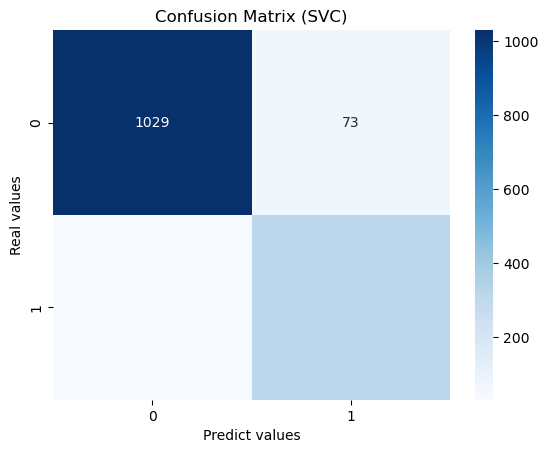

In [32]:
predictions = svc.predict(features_test)
import matplotlib.pyplot as plot
import seaborn as sns
confusion = confusion_matrix(labels_test, predictions)
sns.heatmap(confusion, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (SVC)")
plot.show()

In [33]:
train_score_c4 = svc.score(features_train, labels_train)
test_score_c4 = svc.score(features_test, labels_test)


print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.92
Classical SVC on the test dataset:     0.93


In [34]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, predictions, digits=6))

              precision    recall  f1-score   support

           0   0.969840  0.933757  0.951456      1102
           1   0.812339  0.908046  0.857531       348

    accuracy                       0.927586      1450
   macro avg   0.891090  0.920901  0.904493      1450
weighted avg   0.932040  0.927586  0.928914      1450



VQC

In [38]:
features = data_pca.drop(columns='class')

In [39]:
num_features = features.shape[1]

## SPSA

In [40]:
!pip install qiskit-terra qiskit-aqua

  Using cached qiskit_terra-0.46.1-cp38-abi3-win_amd64.whl.metadata (12 kB)
  Using cached qiskit_aqua-0.9.5-py3-none-any.whl.metadata (2.6 kB)
  Using cached qiskit_ignis-0.7.1-py3-none-any.whl.metadata (10 kB)
  Using cached dlx-1.0.4.tar.gz (5.5 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached docplex-2.27.239.tar.gz (635 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached h5py-3.2.1.tar.gz (368 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting require

  error: subprocess-exited-with-error
  
  × pip subprocess to install backend dependencies did not run successfully.
  │ exit code: 1
  ╰─> [229 lines of output]
        Using cached Cython-3.0.10-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
        Using cached numpy-1.19.3.zip (7.3 MB)
        Installing build dependencies: started
        Installing build dependencies: finished with status 'done'
        Getting requirements to build wheel: started
        Getting requirements to build wheel: finished with status 'done'
        Preparing metadata (pyproject.toml): started
        Preparing metadata (pyproject.toml): finished with status 'error'
        error: subprocess-exited-with-error
      
        × Preparing metadata (pyproject.toml) did not run successfully.
        │ exit code: 1
        ╰─> [202 lines of output]
            setup.py:67: RuntimeWarning: NumPy 1.19.3 may not yet support Python 3.11.
              warnings.warn(
            Running from numpy source directory.

In [41]:
from qiskit_algorithms.optimizers import SPSA
optimizer = SPSA(maxiter=100)

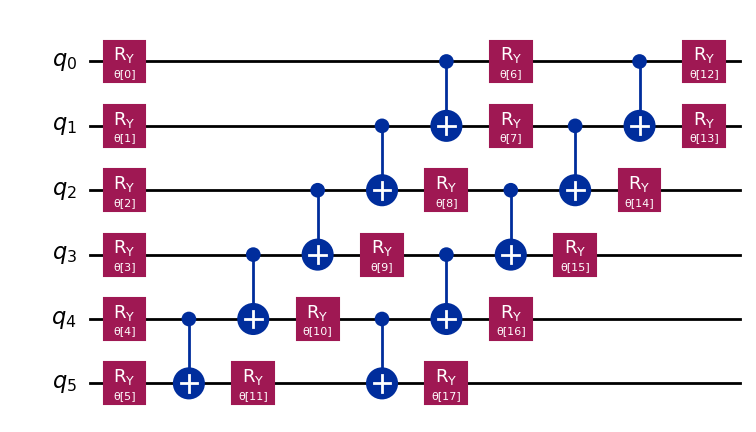

In [42]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

In [43]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [44]:
import numpy as np
X_train_np = np.array(features_train.values)
y_train_np = labels_train.values

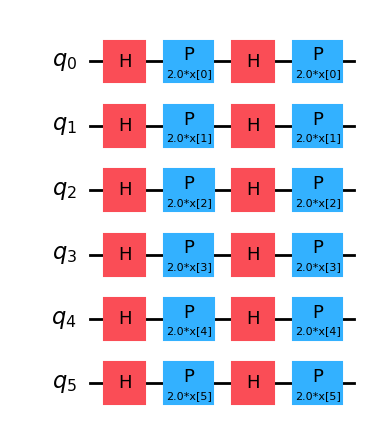

In [45]:
from qiskit.circuit.library import ZFeatureMap
import matplotlib.pyplot as plt
num_features = features.shape[1]
feature_map = ZFeatureMap(feature_dimension=num_features, reps=2)
feature_map.decompose().draw(output="mpl", fold=20)

In [46]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [47]:
!pip install qiskit-machine-learning

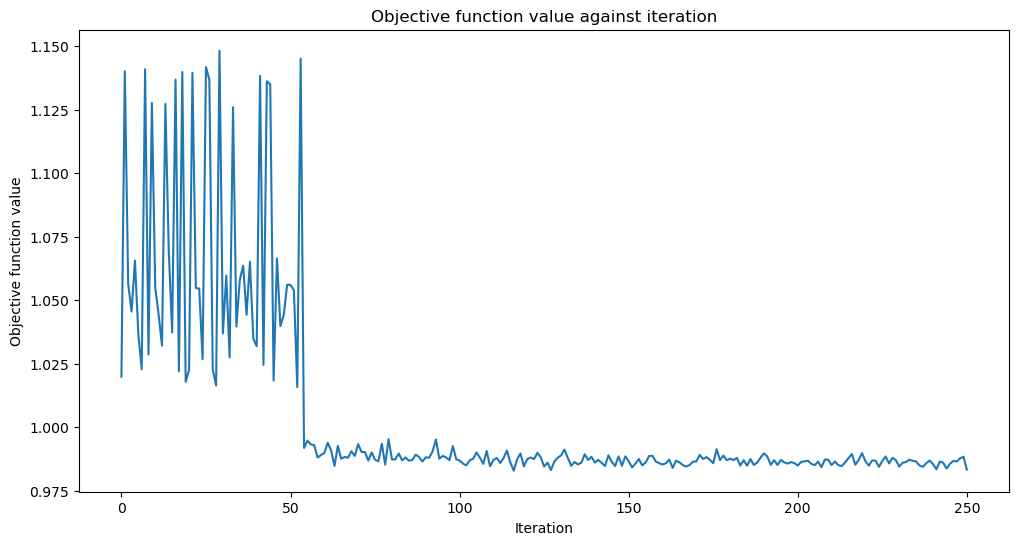

Training time: 2292 seconds


In [48]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [49]:
X_test_np = np.array(features_test.values)
y_test_np = labels_test.values

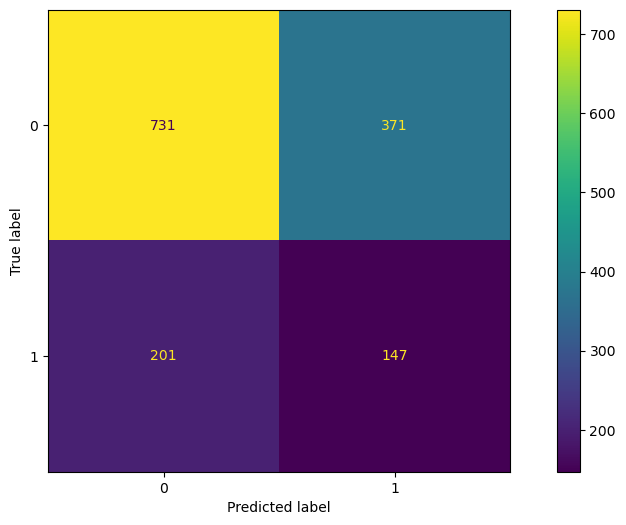

In [50]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion2).plot()
#sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
#plot.xlabel("Predict values")
#plot.ylabel("Real values")
#plot.title("Confusion Matrix (VQC)")
#plot.show()

In [51]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.54
Quantum VQC on the test dataset:     0.61


In [52]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.784335  0.663339  0.718781      1102
           1   0.283784  0.422414  0.339492       348

    accuracy                       0.605517      1450
   macro avg   0.534059  0.542877  0.529136      1450
weighted avg   0.664203  0.605517  0.627751      1450



Utilizando Pegasus

In [53]:
import numpy as np
X_train_np = np.array(features_train.values)
y_train_np = labels_train.values

In [54]:
import numpy as np
X_test_np = np.array(features_test.values)
y_test_np = labels_test.values

In [55]:
# number of qubits is equal to the number of features
num_qubits = len(features.columns)

# number of steps performed during the training procedure
tau = 100

# regularization parameter
C = 1000

In [56]:
#from qiskit import BasicAer
from qiskit.circuit.library import ZFeatureMap
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.kernels import FidelityQuantumKernel

algorithm_globals.random_seed = 12345

feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=1)

qkernel = FidelityQuantumKernel(feature_map=feature_map)

In [57]:
from qiskit_machine_learning.algorithms import PegasosQSVC
import time
np.random.seed(123)
pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=C, num_steps=tau)

# training
start = time.time()
pegasos_qsvc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

# testing
pegasos_score = pegasos_qsvc.score(X_test_np, y_test_np)
print(f"PegasosQSVC classification test score: {pegasos_score}")

Training time: 6 seconds
PegasosQSVC classification test score: 0.5834482758620689


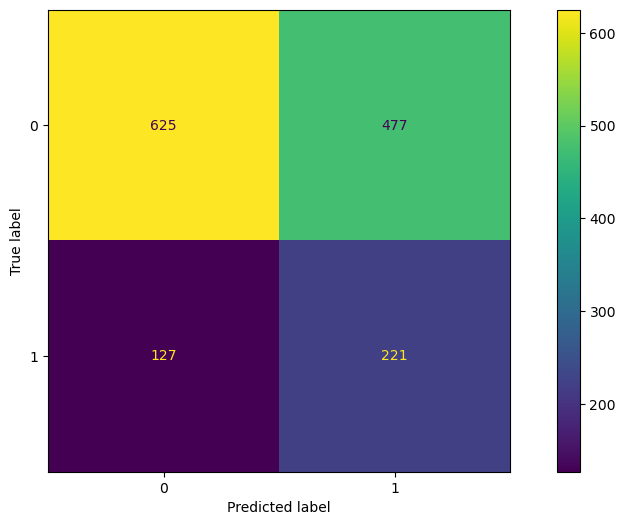

In [58]:
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.metrics import confusion_matrix
q_predictions = pegasos_qsvc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion2).plot()
#sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
#plot.xlabel("Predict values")
#plot.ylabel("Real values")
#plot.title("Confusion Matrix (PegasusQSVC)")
#plot.show()

In [59]:
train_score_q4 = pegasos_qsvc.score(X_train_np, y_train_np)
test_score_q4 = pegasos_qsvc.score(X_test_np, y_test_np)

print(f"Quantum PQSVC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum PQSVC on the test dataset:     {test_score_q4:.2f}")

Quantum PQSVC on the training dataset: 0.62
Quantum PQSVC on the test dataset:     0.58


In [60]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.831117  0.567151  0.674218      1102
           1   0.316619  0.635057  0.422562       348

    accuracy                       0.583448      1450
   macro avg   0.573868  0.601104  0.548390      1450
weighted avg   0.707637  0.583448  0.613821      1450

